In [1]:
## iris dataset
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


In [2]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [4]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

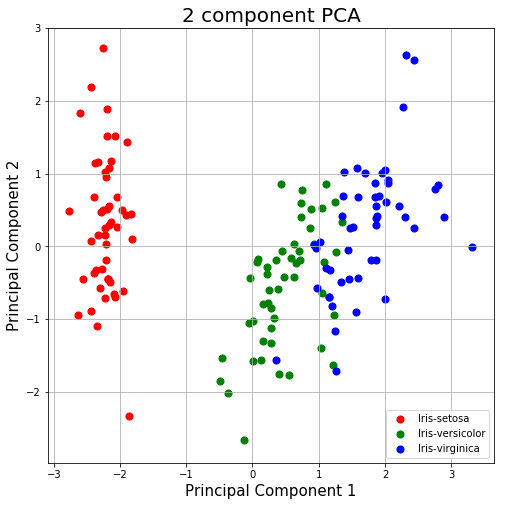

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [7]:
## two componenet explaining 95% variance 
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [8]:
## mnist dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [15]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [16]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\Users\ashishranjan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
#Import and Apply PCA
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [18]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
#Apply the mapping (transform) to both the training set and the test set.
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [21]:
#Apply Logistic Regression to the Transformed Data

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [22]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([1.])

In [24]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [25]:
logisticRegr.score(test_img, test_lbl)

0.9201